 Titanic - Machine Learning from Disaster. welcome to thie notebook to Predict the survival on the Titanic with ML basics

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [128]:
# Read CSV train data file into DataFrame
train = pd.read_csv("train.csv")

# Read CSV test data file into DataFrame
test = pd.read_csv("test.csv")

gender = pd.read_csv("gender_submission.csv")

In [129]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


train data has 891 rows and 12 columns

In [130]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


test data has 418 rows and 11 columns

In [132]:
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


As we can see that "test" file has 11 columns ans dont has 'Survived' columns, we are trying to insert that column from "gender_submission" file to "test" file

In [133]:
test.insert(1, 'Survived', gender['Survived'])

In [134]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [135]:
test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


DATA QUALITY AND MISSING VALUE

In [136]:
# check missing values in train data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [137]:
train.isnull().sum() * 100 / len(train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

cabin 77% missing values, embarked 0.22 % and age has 19.8%

In [138]:
# check missing values in train data
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age, Cabin and Embarked has some missing values in both data set

In [139]:
test.isnull().sum() * 100 / len(test)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

DATA CLEANING

S    644
C    168
Q     77
Name: Embarked, dtype: int64


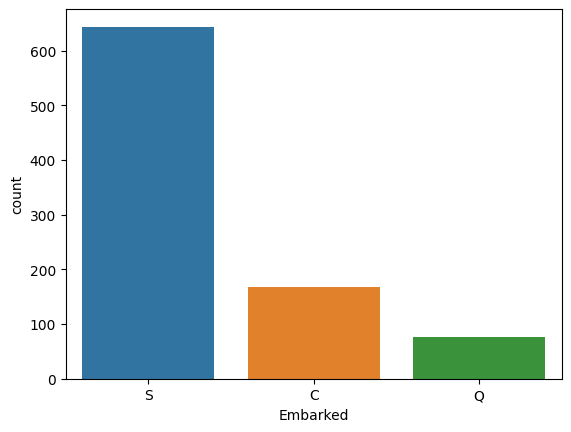

In [140]:

print(train['Embarked'].value_counts())
sns.countplot(x = 'Embarked', data=train)
plt.show()

The most common boarding port of embarkation is S, So I'll impute those 2 NaN with  "S".
Based on the assessment of the missing values in the dataset, following changes to the data can be made:

where "Age" is missing, I'll impute with mean age.
Where "Embarked" is missing, I'll impute with "S" (the most common boarding port).
There are too many missing values for imputation in "cabin" column, so I'll drop that column. Based on the information available, it appears that this value is associated with the passenger's class and fare paid.

In [141]:
train_data = train.copy()
train_data["Age"].fillna(train["Age"].mean(skipna=True), inplace=True)
train_data["Embarked"].fillna(train['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [142]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

C:\Users\shazi\AppData\Local\Temp\ipykernel_13172\1747388805.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i+1)
C:\Users\shazi\AppData\Local\Temp\ipykernel_13172\1747388805.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i+1)
C:\Users\shazi\AppData\Local\Temp\ipykernel_13172\1747388805.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i+1)
C:\Users\shazi\AppData\Local\Temp\ipykernel_13172\1747388805.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicit

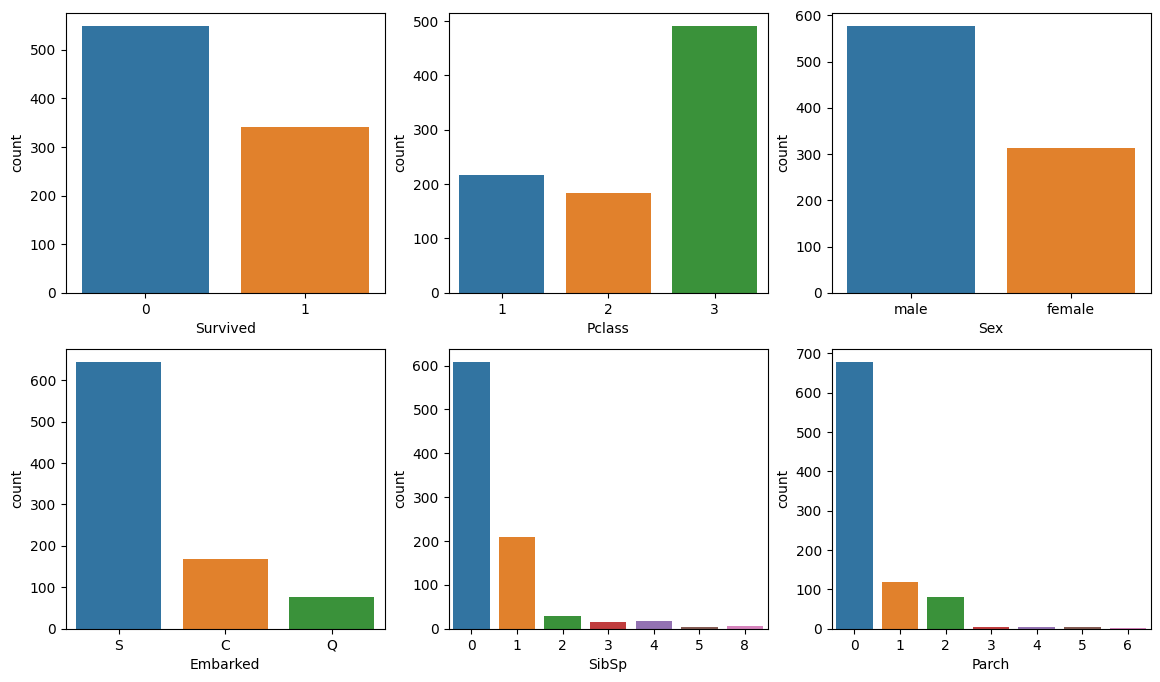

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
columns = ['Survived', 'Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
for i in range(len(columns)):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=train, x=columns[i])

C:\Users\shazi\AppData\Local\Temp\ipykernel_13172\1875891330.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i+1)
C:\Users\shazi\AppData\Local\Temp\ipykernel_13172\1875891330.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i+1)
C:\Users\shazi\AppData\Local\Temp\ipykernel_13172\1875891330.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i+1)
C:\Users\shazi\AppData\Local\Temp\ipykernel_13172\1875891330.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicit

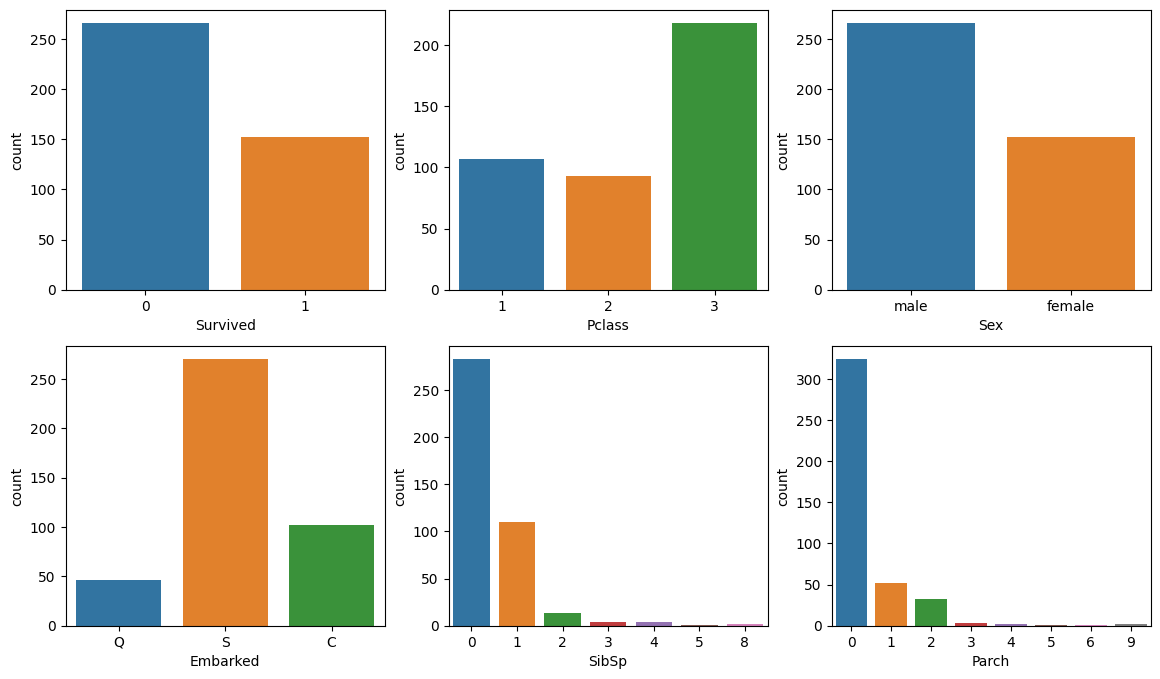

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
columns = ['Survived', 'Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']
for i in range(len(columns)):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=test, x=columns[i])

C:\Users\shazi\AppData\Local\Temp\ipykernel_13172\3125047705.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()
C:\Users\shazi\AppData\Local\Temp\ipykernel_13172\3125047705.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True)


<AxesSubplot: >

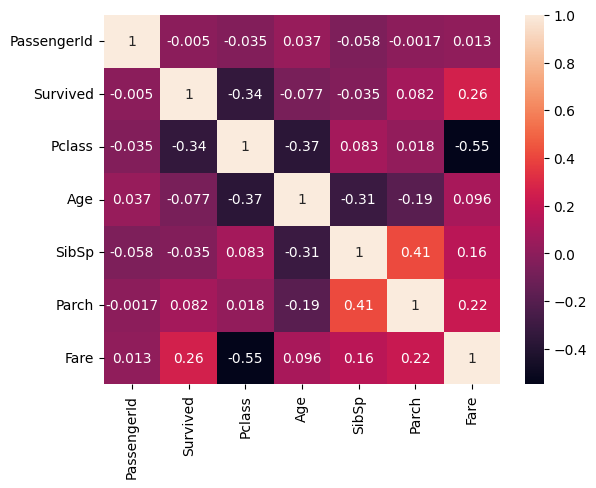

In [ ]:
train.corr()
sns.heatmap(train.corr(), annot=True)

In [ ]:
train.corr()["Survived"].sort_values(ascending=False)

C:\Users\shazi\AppData\Local\Temp\ipykernel_13172\254773384.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()["Survived"].sort_values(ascending=False)


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

# There is a positive correlation between survival and fare and parent/child.
###### There is a negative correlation between survival and age, sibling/spouse, and passenger class.

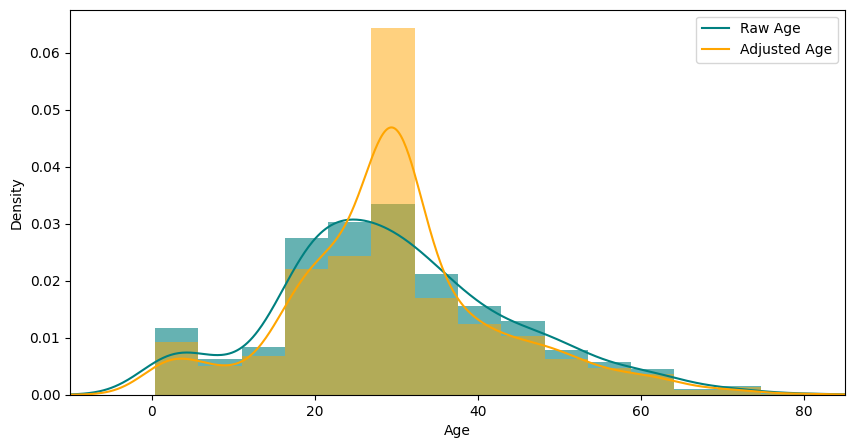

In [ ]:
plt.figure(figsize=(10,5))
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

According to the Kaggle data dictionary, both SibSp and Parch relate to traveling with family. For data simplicity, I'll combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [ ]:
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [ ]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,C,1


i have  iused pd.get_dummies() to create categorical variables for Passenger Class ("Pclass"), Gender ("Sex"), and Port Embarked ("Embarked") into dummy variable @training'

In [ ]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])

training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)
final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


Now, apply the same changes to the test data.
I will apply to same imputation for "Age" in the Test data as I did for my Training data (if missing, Age = mean).
I'll also remove the "Cabin" variable from the test data, as I've decided not to include it in my analysis.
There were no missing values in the "Embarked" port variable.
I'll add the dummy variables to finalize the test set.
Finally, I'll impute the 1 missing value for "Fare" with the median, 14.45.

In [ ]:
test_data = test.copy()
test_data["Age"].fillna(train["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,34.5,7.8292,1,0,0,1,0,1,0,1
1,1,47.0,7.0000,0,0,0,1,0,0,1,0
2,0,62.0,9.6875,1,0,1,0,0,1,0,1
3,0,27.0,8.6625,1,0,0,1,0,0,1,1
4,1,22.0,12.2875,0,0,0,1,0,0,1,0


expolaration of age

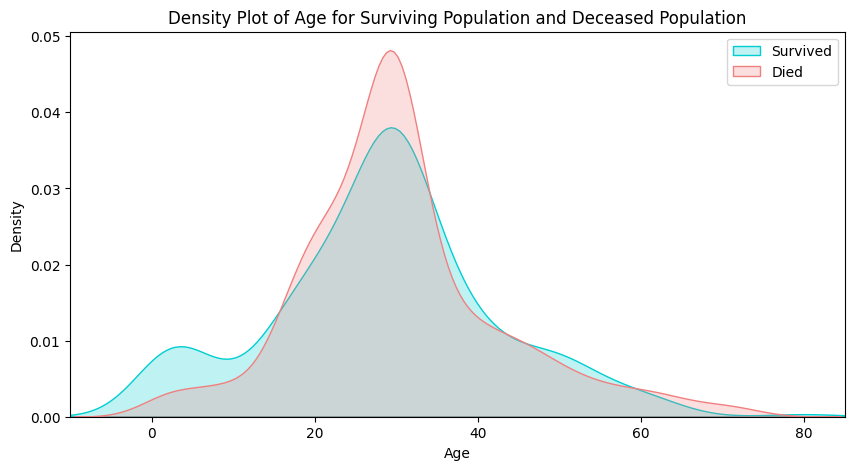

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()


The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children.

expoloration of fare

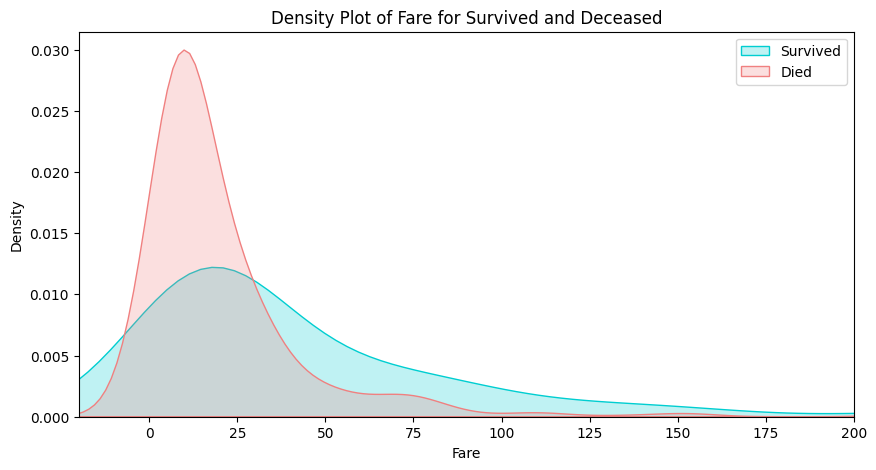

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Survived and Deceased')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. 

In [ ]:
train.drop('Name', axis=1, inplace=True)

Since there are two data already, so no need of splitting as train and test, rather assigning X_train, y_train, x_test. y_test variables for model building

In [ ]:
##splitting data
X_train = final_train.drop (["Survived"], axis=1)
y_train = final_train.iloc[:, 0]

X_test = final_test.drop (['Survived'], axis=1)
y_test = final_test.iloc[:, 0]


In [ ]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
final_train

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.000000,7.2500,0,0,0,1,0,0,1,1
1,1,38.000000,71.2833,0,1,0,0,1,0,0,0
2,1,26.000000,7.9250,1,0,0,1,0,0,1,0
3,1,35.000000,53.1000,0,1,0,0,0,0,1,0
4,0,35.000000,8.0500,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,1,0,1,0,0,0,1,1
887,1,19.000000,30.0000,1,1,0,0,0,0,1,0
888,0,29.699118,23.4500,0,0,0,1,0,0,1,0
889,1,26.000000,30.0000,1,1,0,0,1,0,0,1


In [ ]:
X_train

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,22.000000,7.2500,0,0,0,1,0,0,1,1
1,38.000000,71.2833,0,1,0,0,1,0,0,0
2,26.000000,7.9250,1,0,0,1,0,0,1,0
3,35.000000,53.1000,0,1,0,0,0,0,1,0
4,35.000000,8.0500,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,1,0,1,0,0,0,1,1
887,19.000000,30.0000,1,1,0,0,0,0,1,0
888,29.699118,23.4500,0,0,0,1,0,0,1,0
889,26.000000,30.0000,1,1,0,0,1,0,0,1


In [ ]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X_test

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
413,28.0,8.0500,1,0,0,1,0,0,1,1
414,39.0,108.9000,1,1,0,0,1,0,0,0
415,38.5,7.2500,1,0,0,1,0,0,1,1
416,28.0,8.0500,1,0,0,1,0,0,1,1


In [ ]:
## building the model
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)



c:\Users\shazi\OneDrive\Desktop\developer academy\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
final_train

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.000000,7.2500,0,0,0,1,0,0,1,1
1,1,38.000000,71.2833,0,1,0,0,1,0,0,0
2,1,26.000000,7.9250,1,0,0,1,0,0,1,0
3,1,35.000000,53.1000,0,1,0,0,0,0,1,0
4,0,35.000000,8.0500,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,1,0,1,0,0,0,1,1
887,1,19.000000,30.0000,1,1,0,0,0,0,1,0
888,0,29.699118,23.4500,0,0,0,1,0,0,1,0
889,1,26.000000,30.0000,1,1,0,0,1,0,0,1


In [ ]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [ ]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, pred_LR)

print(accuracy_LR)
print(conf_mat)

0.9545454545454546
[[254  12]
 [  7 145]]


In [ ]:
## naives bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
## predict the test set
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})

,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [ ]:
## Evaluate the naive bayes model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)


print(accuracy_NB)
print(conf_mat_NB)

0.7655502392344498
[[222  44]
 [ 54  98]]


In [ ]:
#K NEAREST NEIGHBOUR
knn_model = KNeighborsClassifier(n_neighbors=5) # define kNN model with k=5
knn_model.fit(X_train, y_train) # fit kNN model

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_model.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})

,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,0,1
4,1,0
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)


print(accuracy_knn)
print(conf_mat_knn)

0.65311004784689
[[198  68]
 [ 77  75]]
